### Project Title

# Loan Default Prediction Using Machine Learning

### Introduction

#### In the financial industry, predicting whether a loan applicant is likely to repay or default on a loan is critical for reducing risk and ensuring profitable lending practices. Machine learning enables financial institutions to analyze historical data and accurately predict such outcomes. This project aims to build predictive models using different classification techniques to assist in making data-driven lending decisions.



## Objective

- Preprocess and clean the loan dataset

- Explore and understand key patterns and correlations

- Build, evaluate, and compare machine learning models

- Identify the most effective model for predicting loan repayment outcomes

## About the Dataset

- Rows : 532428
- columns :45
 
The dataset used in this project consists of loan application records, containing information such as:

Loan details: loan_amnt, term, int_rate

Applicant information: emp_length, annual_inc, home_ownership

Credit history: dti, revol_util, open_acc, delinq_2yrs

### import essential libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 Import essential libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn).

# Data Loading

In [3]:
# Load the dataset
df = pd.read_csv('train_indessa.csv')


# Data Exploration

In [4]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
df.shape

(532428, 45)

In [7]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [6]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


# Data Cleaning

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)

In [9]:
df = df.drop_duplicates()

### Show Missing Values in Percentage

In [9]:
# Total rows
total_rows = df.shape[0]

# Calculate missing value percentages
missing_percent = (df.isnull().sum() / total_rows) * 100

# Create a DataFrame for cleaner display
missing_data = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': missing_percent
}).sort_values(by='Percentage (%)', ascending=False)

# Show top 15
print(missing_data.head(15))


                             Missing Values  Percentage (%)
verification_status_joint            532123       99.942715
desc                                 456829       85.801085
mths_since_last_record               450305       84.575755
mths_since_last_major_derog          399448       75.023853
mths_since_last_delinq               272554       51.190771
batch_enrolled                        85149       15.992585
tot_coll_amt                          42004        7.889142
total_rev_hi_lim                      42004        7.889142
tot_cur_bal                           42004        7.889142
emp_title                             30833        5.791018
emp_length                            26891        5.050636
revol_util                              287        0.053904
collections_12_mths_ex_med               95        0.017843
title                                    91        0.017092
inq_last_6mths                           16        0.003005


In [10]:
# Drop columns with more than 40% missing values
threshold = 40  # percentage
cols_to_drop = missing_percent[missing_percent > threshold].index

# Drop them from the DataFrame
df.drop(columns=cols_to_drop, inplace=True)

# Confirm changes
print(f"Dropped columns: {list(cols_to_drop)}")


Dropped columns: ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint']


### checking corelation of numeric columns

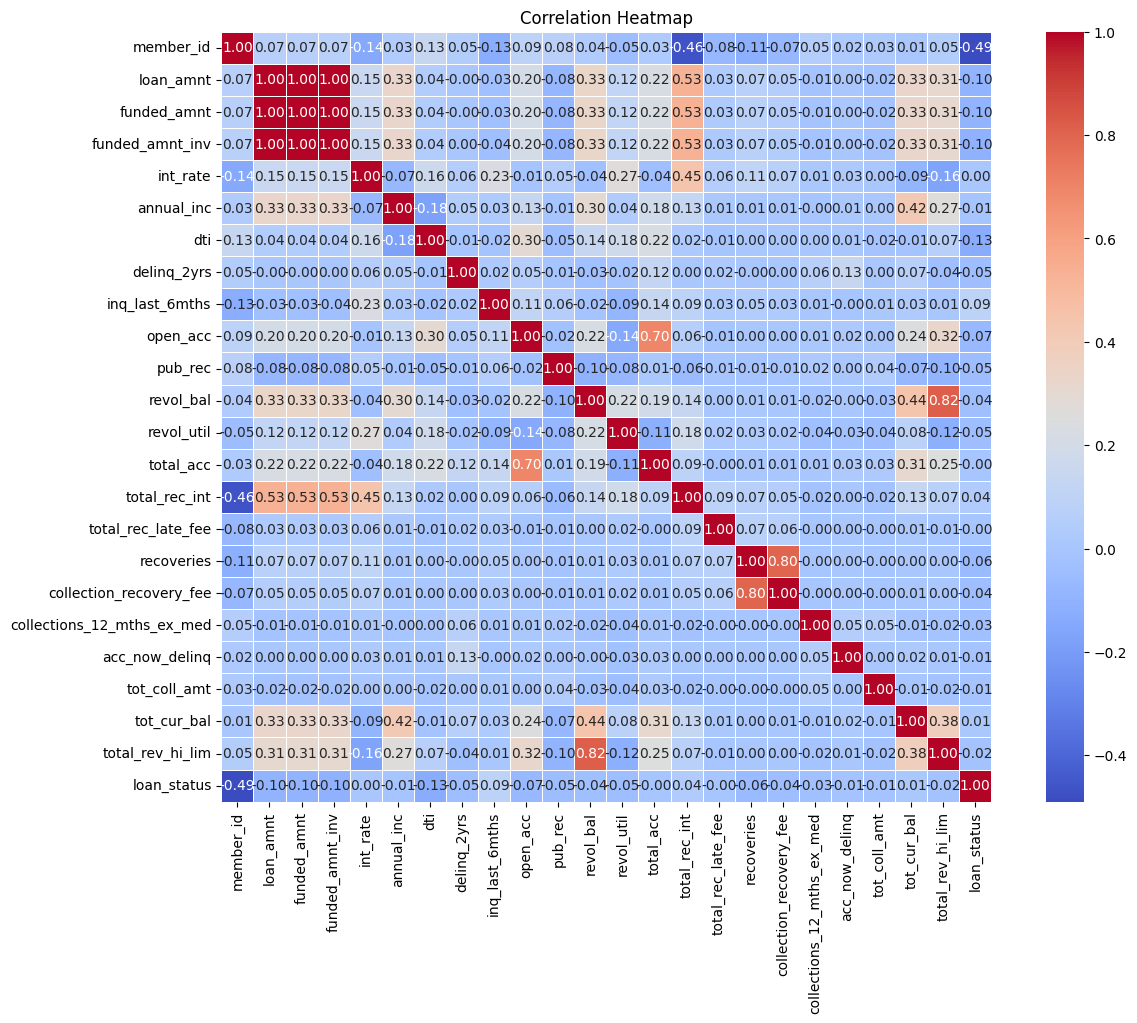

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [12]:
#ropping some columns that are highly correlated (correlation > 0.85–0.9),
df.drop(columns=['funded_amnt', 'funded_amnt_inv', 'total_rev_hi_lim'], inplace=True)


In [13]:
df.head()

,member_id,loan_amnt,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,58189336,14350,36 months,,19.19,E,E3,clerk,9 years,OWN,...,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,...,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,...,0.0,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,0


In [14]:
print(df.isnull().sum().sort_values(ascending = False).head(20))

batch_enrolled                85149
tot_coll_amt                  42004
tot_cur_bal                   42004
emp_title                     30833
emp_length                    26891
revol_util                      287
collections_12_mths_ex_med       95
title                            91
acc_now_delinq                   16
delinq_2yrs                      16
total_acc                        16
pub_rec                          16
open_acc                         16
inq_last_6mths                   16
annual_inc                        3
loan_amnt                         0
member_id                         0
int_rate                          0
term                              0
pymnt_plan                        0
dtype: int64


#### Handling Missing Values and Dropping Irrelevant Columns

In [15]:
# Drop 'batch_enrolled' due to high missing values and low importance
df.drop('batch_enrolled', axis=1, inplace=True)
#Dropped the batch_enrolled column due to its high number of missing values (over 85k) and limited relevance to the modeling objective.

In [16]:
# Fill missing values in 'tot_coll_amt' with 0 (assumes no collections if missing)
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
#Missing values in tot_coll_amt were filled with 0, assuming missing indicates no collection amount reported.

In [17]:
# Fill missing values in 'tot_cur_bal' with 0 (assumes no open balance if missing)
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(0)
#Filled missing values in tot_cur_bal with 0, assuming borrowers may not have active balances if this field is blank.

In [18]:
# Drop emp_title column
df.drop('emp_title', axis=1, inplace=True)
#The emp_title column contains free-text job titles with high variability

In [19]:
# Clean emp_length and convert to float safely
df['emp_length'] = df['emp_length'].replace({
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    'n/a': 0
}).astype(float)

median_emp_length = df['emp_length'].median()
df['emp_length'] = df['emp_length'].fillna(median_emp_length)

C:\Users\Arif Muhammed\AppData\Local\Temp\ipykernel_23940\3561638932.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].replace({


In [20]:
# Fill missing revol_util values with the median
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
#Missing values in the revol_util column were filled using the median utilization ratio to maintain robustness against outliers."

In [21]:
# Fill missing values in collections_12_mths_ex_med with 0
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)
#Filling with zero maintains conservative assumptions and avoids inflating a borrower’s perceived credit risk.

In [22]:
# Fill missing values in 'title' with the most frequent one (mode)
df['title'] = df['title'].fillna(df['title'].mode()[0])
#Filling title with the mode prevents data loss while aligning with common borrower behavior

In [23]:
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0.0)
#"Missing values in acc_now_delinq were imputed with 0.0, assuming no current delinquencies, consistent with the majority of the dataset."

In [24]:
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0.0)
#Missing values in tot_coll_amt were replaced with 0.0, assuming no collection history for those entries."

In [25]:
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(0.0)
#Missing values in tot_cur_bal were filled with 0.0, assuming no current open account balance."


In [26]:
print(df.isnull().sum().sort_values(ascending = False).head(10))

inq_last_6mths    16
delinq_2yrs       16
open_acc          16
total_acc         16
pub_rec           16
annual_inc         3
member_id          0
term               0
loan_amnt          0
emp_length         0
dtype: int64


In [27]:
#  Handling remaining missing values in one cell

# Fill 'inq_last_6mths' (credit inquiries in last 6 months) with median to avoid outlier influence
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(df['inq_last_6mths'].median())

# Fill 'delinq_2yrs' (delinquencies in past 2 years) with 0, assuming no delinquencies
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)

# Fill 'open_acc' (number of open accounts) with median to represent a typical borrower
df['open_acc'] = df['open_acc'].fillna(df['open_acc'].median())

# Fill 'total_acc' (total credit lines) with median for stability and robustness
df['total_acc'] = df['total_acc'].fillna(df['total_acc'].median())

# Fill 'pub_rec' (derogatory public records) with 0, assuming no public records
df['pub_rec'] = df['pub_rec'].fillna(0)

# Fill 'annual_inc' (annual income) with median to minimize skew from extreme values
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())


In [28]:
# Final check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))


member_id              0
loan_amnt              0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
dtype: int64


#### Converting Categorical Text to Numeric Forma

In [29]:
df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
0,58189336,14350,36 months,19.19,E,E3,9.0,OWN,28700.0,Source Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,0
1,70011223,4800,36 months,10.99,B,B4,0.5,MORTGAGE,65000.0,Source Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,0
2,70255675,10000,36 months,7.26,A,A4,2.0,OWN,45000.0,Not Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,0
3,1893936,15000,36 months,19.72,D,D5,10.0,RENT,105000.0,Not Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,0
4,7652106,16000,36 months,10.64,B,B2,10.0,RENT,52000.0,Verified,...,0.0,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,0


In [30]:
# Convert 'term' from string like "36 months" to integer 36
df['term'] = df['term'].astype(str).str.extract(r'(\d+)').astype(int)


In [31]:
# Combine 'Source Verified' and 'Verified' into a single category for consistency
df['verification_status'] = df['verification_status'].replace({
    'Source Verified': 'Verified'
})

In [32]:
df['verification_status']

0             Verified
1             Verified
2         Not Verified
3         Not Verified
4             Verified
              ...     
532423        Verified
532424    Not Verified
532425        Verified
532426        Verified
532427    Not Verified
Name: verification_status, Length: 532428, dtype: object

# Univariate Analysis

### Loan Status Distribution

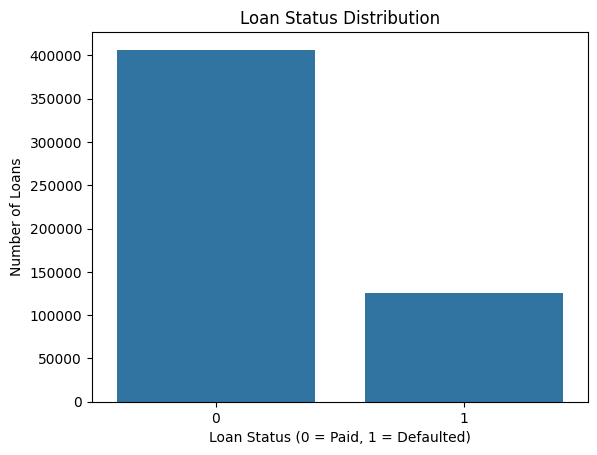

In [33]:
sns.countplot(data=df, x='loan_status')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = Paid, 1 = Defaulted)")
plt.ylabel("Number of Loans")
plt.show()

                      

 Insight 1: Most borrowers successfully repaid their loans. Out of 532,428 loans, over 406,000 (~76.4%) were marked as fully paid.

 Insight 2: A significant portion (~23.6%) of loans ended in default, indicating potential risk factors that need further analysis.

### Distribution of loan amout

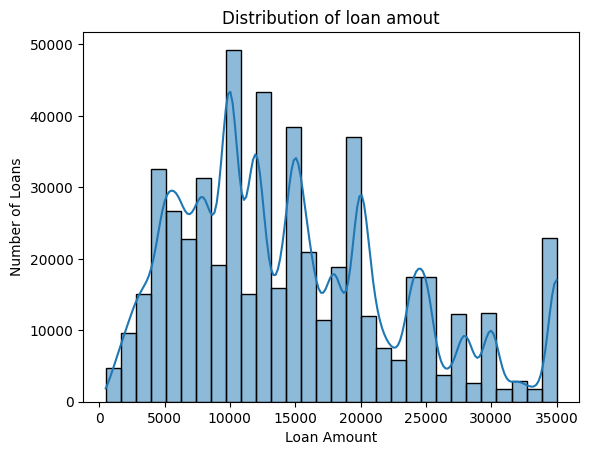

In [34]:
sns.histplot(df['loan_amnt'],bins = 30,kde = True)
plt.title("Distribution of loan amout")
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')
plt.show()

The majority of borrowers take loans between $5,000 and $15,000, with $10,000 being the most popular amount.

### Distribution of loan grade

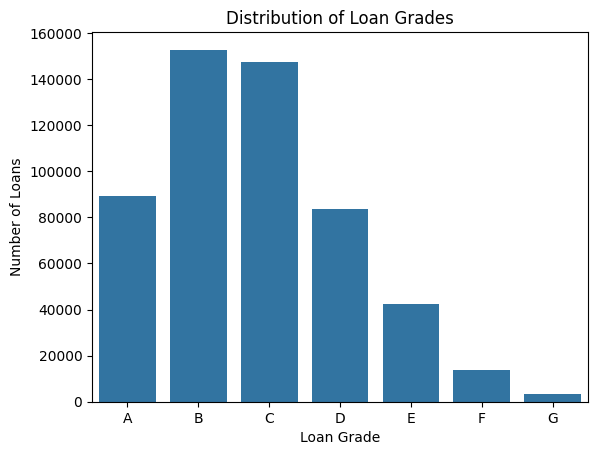

In [35]:
sns.countplot(data=df, x='grade', order=sorted(df['grade'].unique()))
plt.title("Distribution of Loan Grades")
plt.xlabel("Loan Grade")
plt.ylabel("Number of Loans")
plt.show()


The majority of loans fall in Grades B and C, indicating that most borrowers have good to fair credit scores.

### Distribution How long the person has been employed

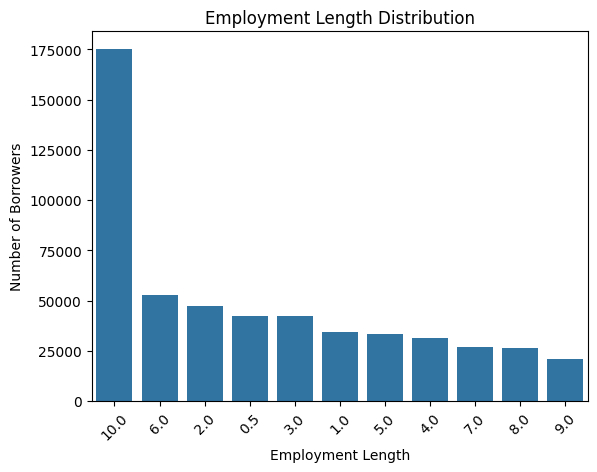

In [36]:
sns.countplot(data = df, x = 'emp_length',order = df['emp_length'].value_counts().index)
plt.title("Employment Length Distribution")
plt.xticks(rotation=45)
plt.xlabel("Employment Length")
plt.ylabel("Number of Borrowers")
plt.show()

The majority of borrowers (200K+) have 10+ years of work experience.

### Distribution of purpose of loans

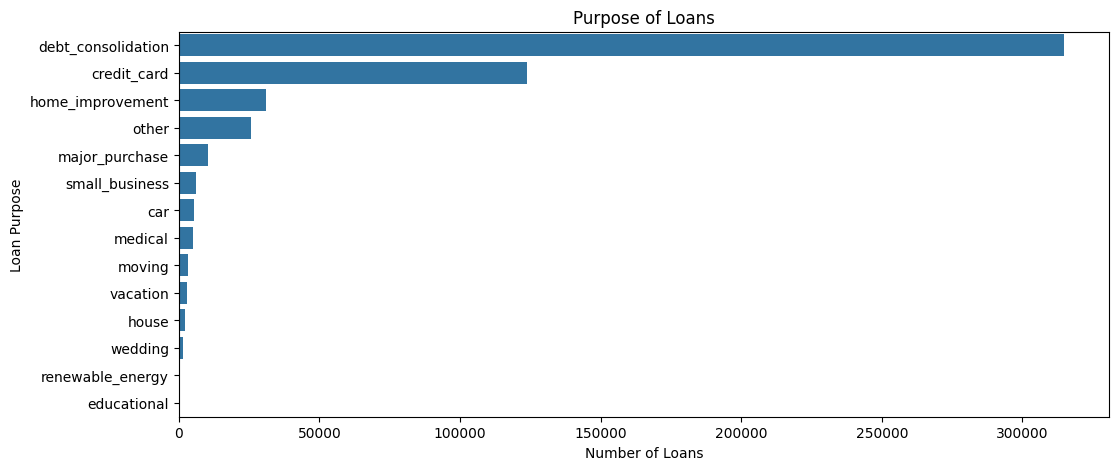

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index)
plt.title("Purpose of Loans")
plt.xlabel("Number of Loans")
plt.ylabel("Loan Purpose")
plt.show()


✅ Insight 1: The majority of borrowers (60%+) take loans for debt consolidation, meaning they combine multiple debts into a single loan with (hopefully) a lower interest rate.

#### Distribution of interest rate

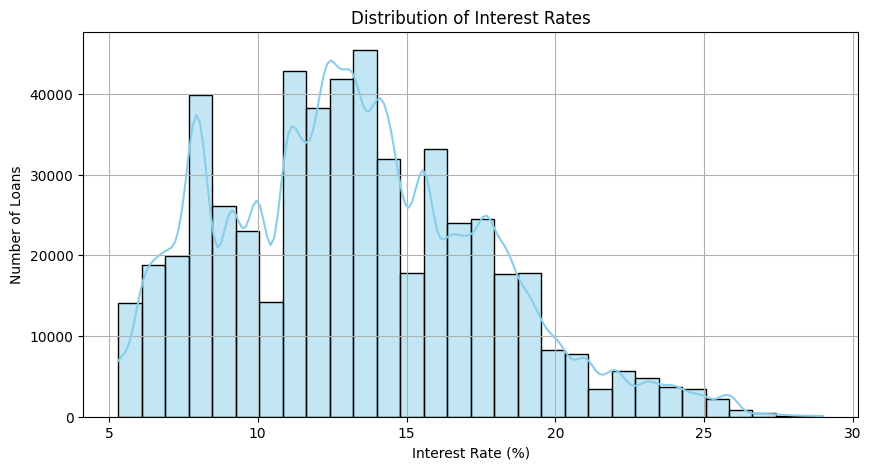

In [38]:
# Univariate analysis for Interest Rate
plt.figure(figsize=(10, 5))
sns.histplot(df['int_rate'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Interest Rates")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Number of Loans")
plt.grid(True)
plt.show()


🔺 There are visible peaks at certain standard rates (e.g., around 7%, 11%, 13%), indicating standardized lending brackets likely tied to credit grades.

🔻 Fewer loans have extremely high interest rates (above 20%), possibly indicating high-risk borrowers or subprime lending.

#### Distribution of annual income

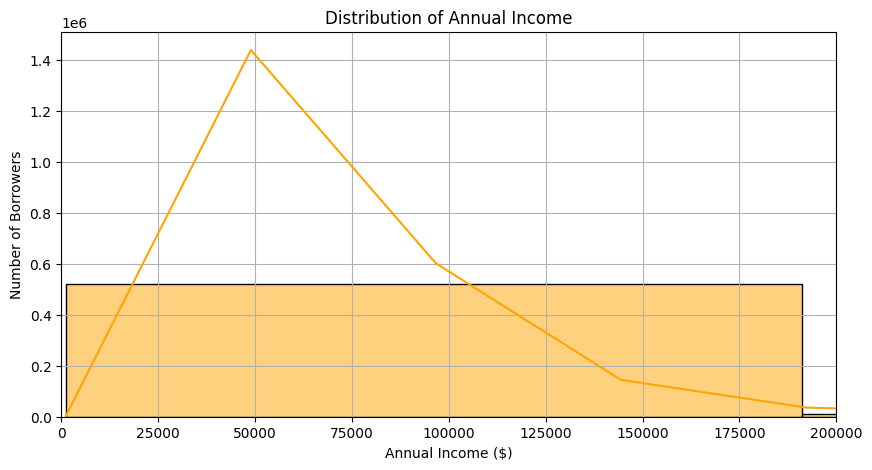

In [39]:
# Univariate analysis for Annual Income
plt.figure(figsize=(10, 5))
sns.histplot(df['annual_inc'], bins=50, kde=True, color='orange')
plt.xlim(0, 200000)  # Limit axis to reduce the impact of outliers
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Number of Borrowers")
plt.grid(True)
plt.show()


🟧 Peak near $50,000: Most borrowers fall in the $40k–$60k income range, indicating LendingClub primarily serves middle-income individuals.

🔻 Sharp decline after $100k: Fewer high-income individuals borrow from the platform.

📉 Long tail toward higher incomes**: There are some borrowers with incomes exceeding $150k, but they are very few — possibly outliers.

#### Distribution of home ownership

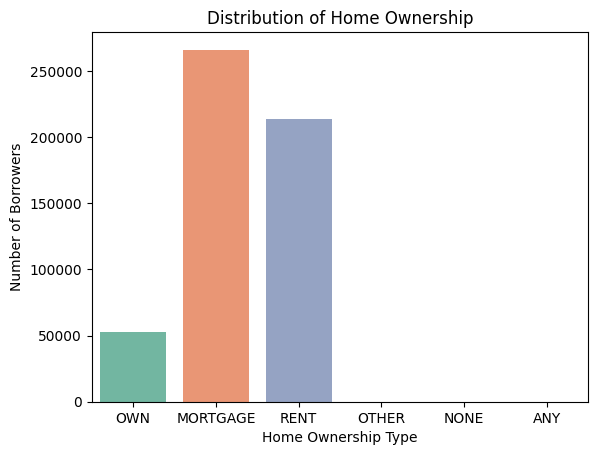

In [40]:
# Univariate analysis for Home Ownership
sns.countplot(data=df, x='home_ownership', hue='home_ownership', palette='Set2', legend=False)
plt.title("Distribution of Home Ownership")
plt.xlabel("Home Ownership Type")
plt.ylabel("Number of Borrowers")
plt.show()

- Mortgage holders are the largest group.
- Renters are the second largest.
- Few borrowers fully own their homes (OWN).

#### Term Distribution (term)

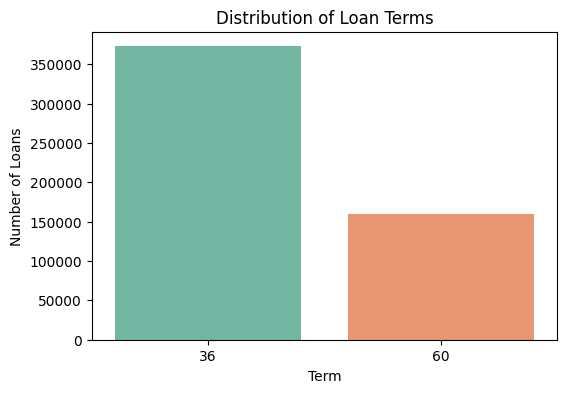

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='term', hue='term', palette='Set2', legend=False)

plt.title('Distribution of Loan Terms')
plt.xlabel('Term')
plt.ylabel('Number of Loans')
plt.show()


- Majority of the loans (~70%) are for a term of 36 months, while 60-month loans make up a smaller      portion.
- This could indicate that borrowers either prefer shorter repayment periods or qualify more easily     for shorter terms.

###  Verification Status

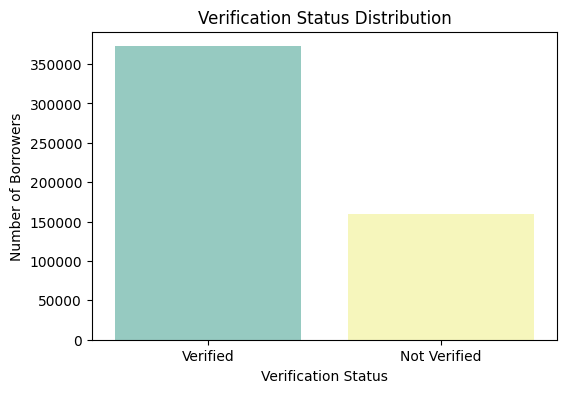

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='verification_status', hue='verification_status', palette='Set3', legend=False)
plt.title('Verification Status Distribution')
plt.xlabel('Verification Status')
plt.ylabel('Number of Borrowers')
plt.show()


- "Source Verified" is the most common verification status among borrowers, followed closely by         "Verified".
- A significant portion of loans (around 160,000+) were issued to individuals who were "Not Verified".

#### revol_util (Credit Utilization Ratio)

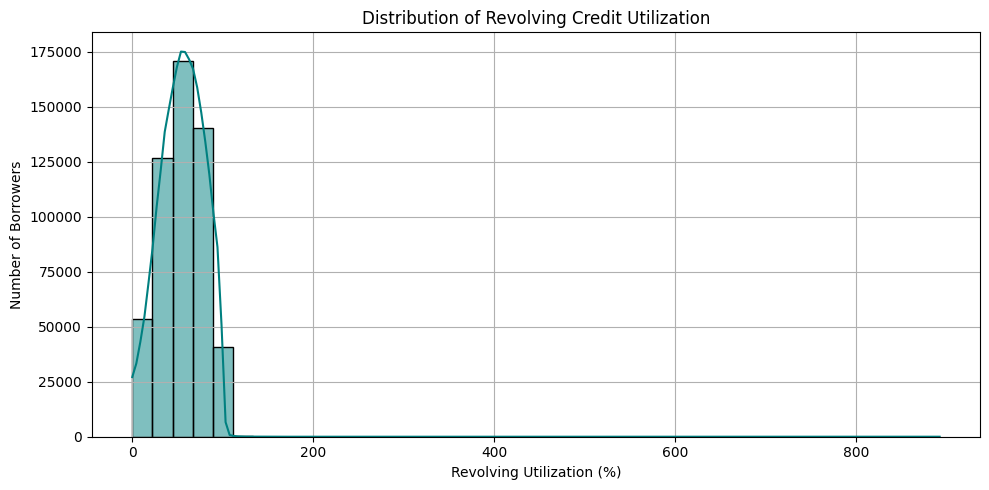

In [43]:

plt.figure(figsize=(10, 5))
sns.histplot(df['revol_util'], bins=40, kde=True, color='teal')
plt.title('Distribution of Revolving Credit Utilization')
plt.xlabel('Revolving Utilization (%)')
plt.ylabel('Number of Borrowers')
plt.grid(True)
plt.tight_layout()
plt.show()

-  The majority of borrowers have utilization ratios concentrated between 0% and 100%, with a strong     peak around 40%–60%.

# Bivariate Analysis

###  Loan Status vs Loan Amount

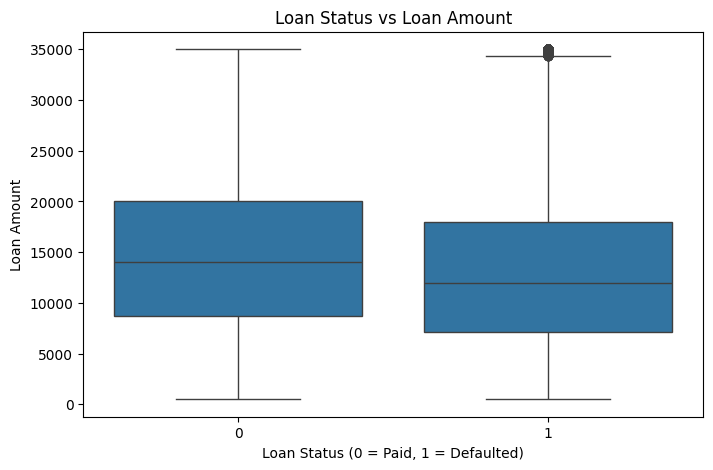

In [44]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status (0 = Paid, 1 = Defaulted)')
plt.ylabel('Loan Amount')
plt.show()

Borrowers with slightly smaller loan amounts still face defaults, indicating that loan size alone isn’t a strong indicator of repayment ability. Other features (like income, credit score, etc.) might be more influential in determining default risk.

### Loan Status vs Term

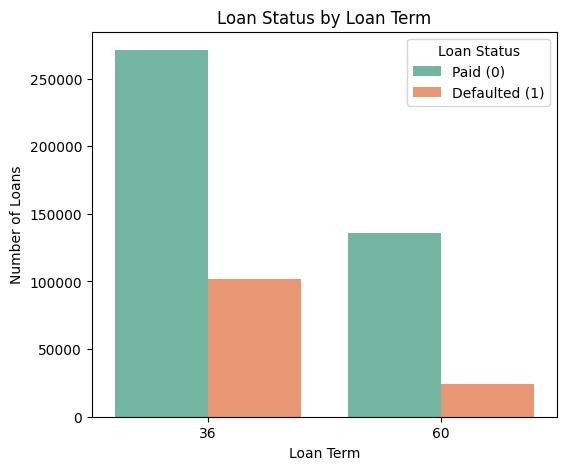

In [45]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='term', hue='loan_status', palette='Set2')
plt.title('Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Paid (0)', 'Defaulted (1)'])
plt.show()

- 36-month loans have both the highest count of paid and defaulted loans.
- However, the default rate is noticeably higher for 60-month loans compared to 36-month ones.

### Loan Status vs Interest Rate

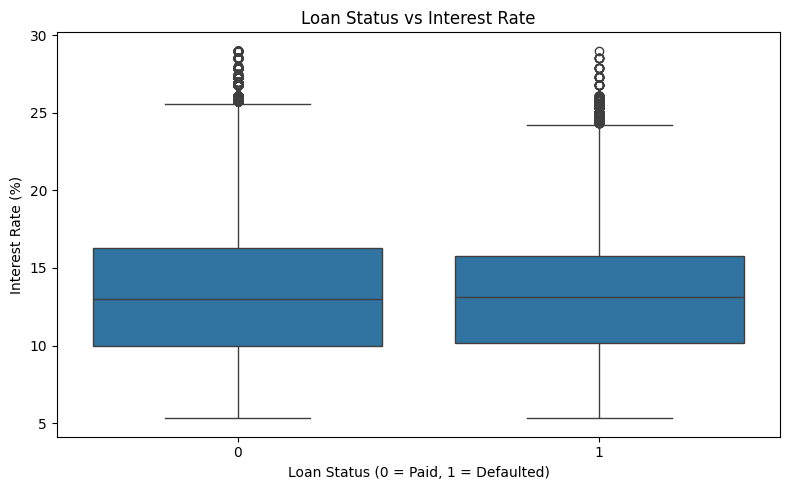

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='loan_status', y='int_rate')

# Customize labels and title
plt.xlabel('Loan Status (0 = Paid, 1 = Defaulted)')
plt.ylabel('Interest Rate (%)')
plt.title('Loan Status vs Interest Rate')

plt.tight_layout()
plt.show()

While interest rate alone is not a strong discriminator between paid and defaulted loans, there’s a subtle trend suggesting that loans with higher interest rates are more prone to default, likely because they are assigned to higher-risk borrowers.

### Loan status by grade

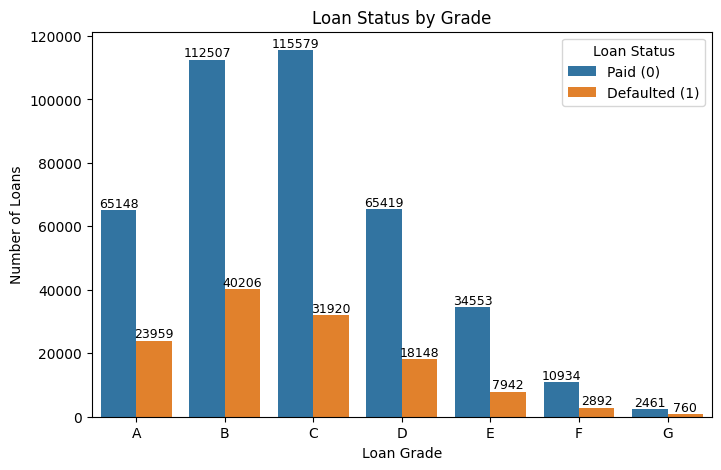

In [47]:

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='grade', hue='loan_status', order=sorted(df['grade'].unique()))
plt.title("Loan Status by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Number of Loans")
plt.legend(title='Loan Status', labels=['Paid (0)', 'Defaulted (1)'])

# Add values on bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.show()


1)loan grade B and C have the highest volume of loans
2)default numbers are significant across all grade ,but grade B has the highest number of defaults
3)while f and g have fewer loans,they still show a notable default presentage high risk even with small volume

### Loan Status vs Employment Length

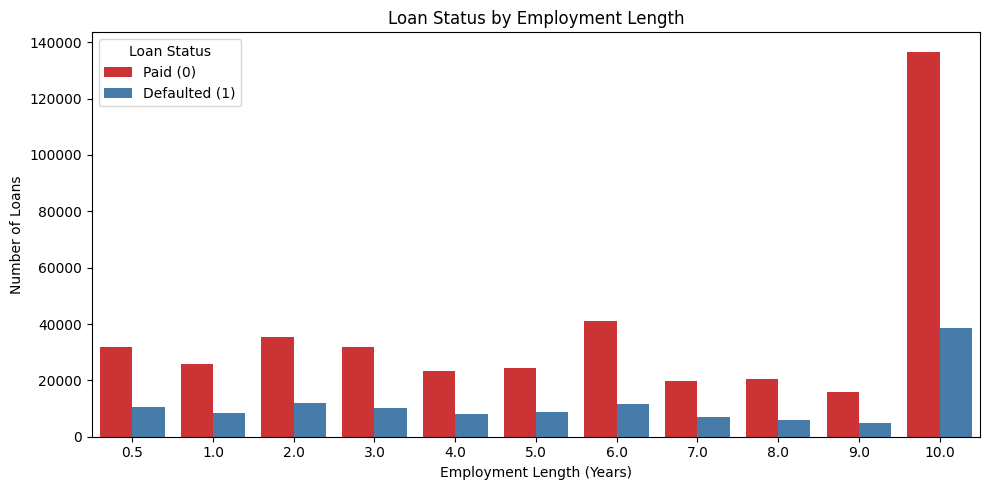

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='emp_length', hue='loan_status', palette='Set1')
plt.title('Loan Status by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Paid (0)', 'Defaulted (1)'])
plt.tight_layout()
plt.show()

- Borrowers with 10+ years of employment have the highest number of loans issued, both paid and         defaulted — possibly due to their large representation in the dataset.
- Default rates appear somewhat stable across employment lengths, but slightly higher proportions of    defaults may be observed in the mid-range experience (2–6 years).
- Newer employees (<1 year) also have a notable number of defaults, possibly due to lower job           stability or income certainty.

### Loan Status vs Home Ownership

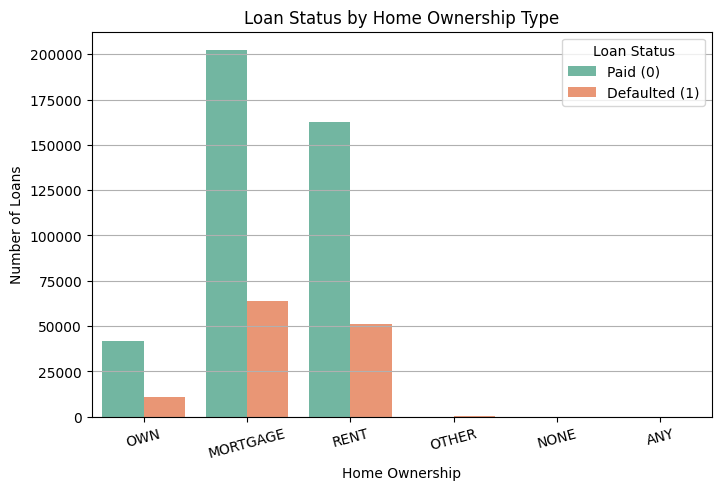

In [49]:
#Count of Loan Status by Home Ownership
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='home_ownership', hue='loan_status', palette='Set2')
plt.title('Loan Status by Home Ownership Type')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Paid (0)', 'Defaulted (1)'])
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

Most loans were taken by borrowers with a mortgage or renting. Defaults were higher among renters compared to owners, suggesting home ownership might be linked to better loan repayment behavior.

#### Verification Status vs Loan Status

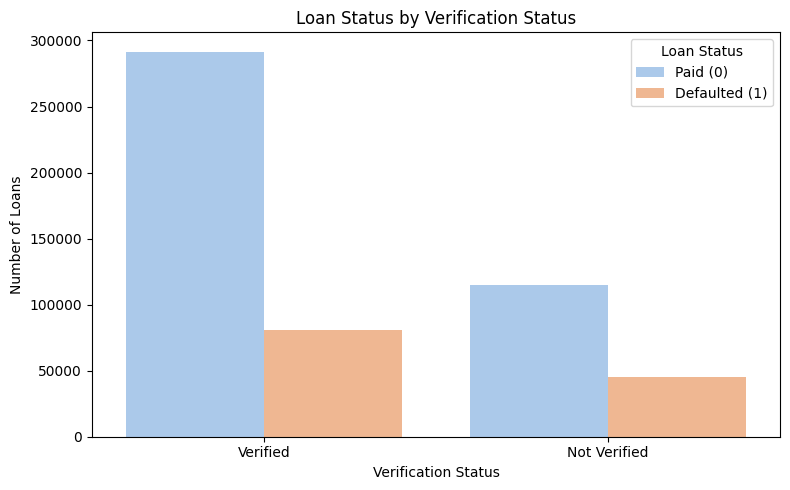

In [50]:
# Bivariate Analysis: Loan Status by Verification Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='verification_status', hue='loan_status', palette='pastel')
plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Paid (0)', 'Defaulted (1)'])
plt.tight_layout()
plt.show()


- Source Verified borrowers show a higher number of paid loans and comparatively fewer defaults.

- Not Verified borrowers have the highest proportion of defaults relative to paid loans.

- Verified status also shows a decent number of paid loans, but default rates are slightly higher       than Source Verified.

### Loan Status vs Application Type

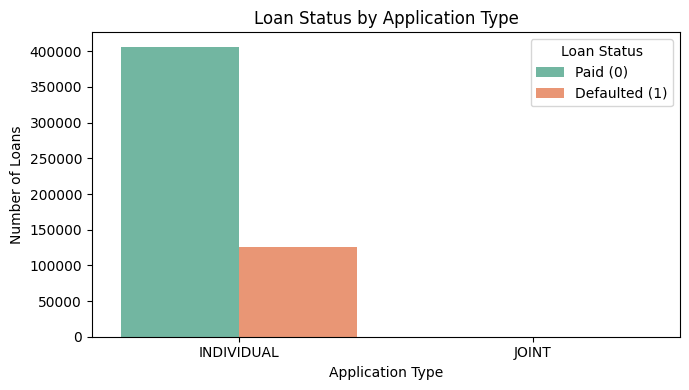

In [51]:

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='application_type', hue='loan_status', palette='Set2')

plt.title('Loan Status by Application Type')
plt.xlabel('Application Type')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', labels=['Paid (0)', 'Defaulted (1)'])
plt.tight_layout()
plt.show()

- Most applications are from individuals, with very few joint applications.

- Among individual applications, there is a noticeable number of defaults.

### Loan Status vs Revolving Credit Utilization

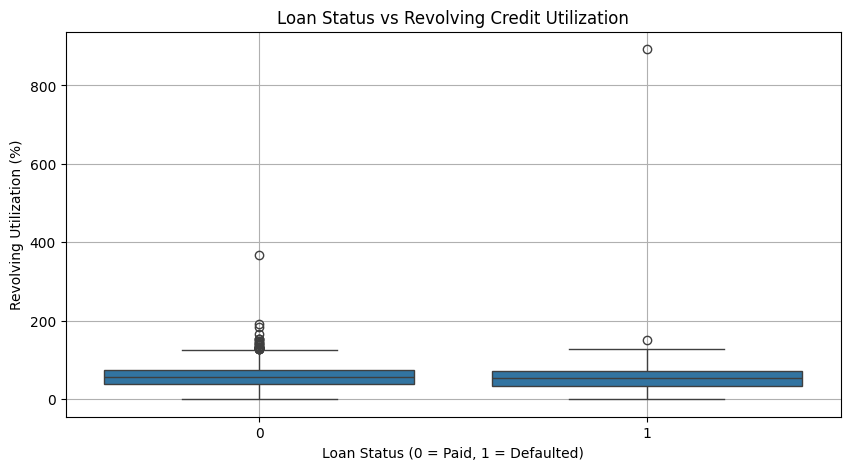

In [52]:
# 📊 Boxplot: Loan Status vs Revolving Credit Utilization
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='loan_status', y='revol_util')
plt.title('Loan Status vs Revolving Credit Utilization')
plt.xlabel('Loan Status (0 = Paid, 1 = Defaulted)')
plt.ylabel('Revolving Utilization (%)')
plt.grid(True)
plt.show()


- Overall Trend: Borrowers who defaulted (loan_status = 1) tend to have slightly higher revolving credit utilization than those who paid (loan_status = 0), though the difference is not dramatic.

###  Loan Status vs Annual Income

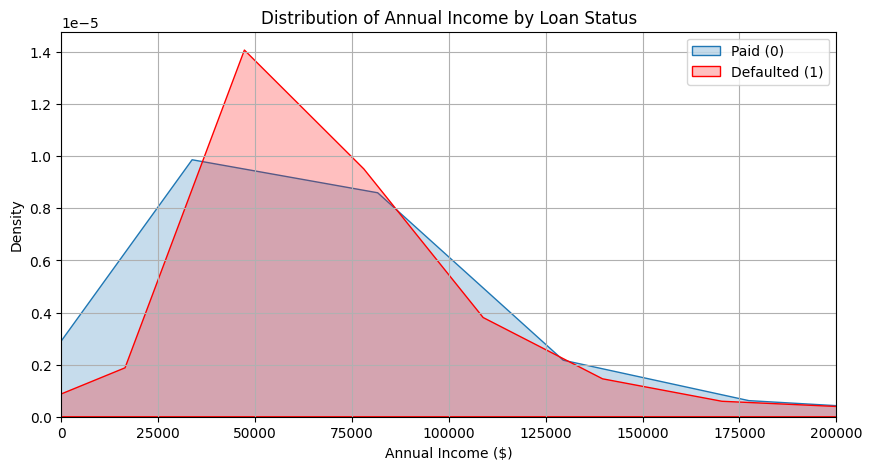

In [53]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['loan_status'] == 0]['annual_inc'], label='Paid (0)', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['annual_inc'], label='Defaulted (1)', fill=True, color='r')
plt.title('Distribution of Annual Income by Loan Status')
plt.xlabel('Annual Income ($)')
plt.ylabel('Density')
plt.xlim(0, 200000)  # Focus on realistic range
plt.legend()
plt.grid(True)
plt.show()


🔵 Borrowers with lower annual incomes (especially around $40k–$60k) show a higher default density, indicated by the red line peaking above the blue.

🔵 As income increases (beyond ~$75k), the density of defaults drops compared to paid loans.

🔵 This suggests that lower-income borrowers are more likely to default, while higher-income borrowers tend to repay loans more consistently.

### Loan status by purpose

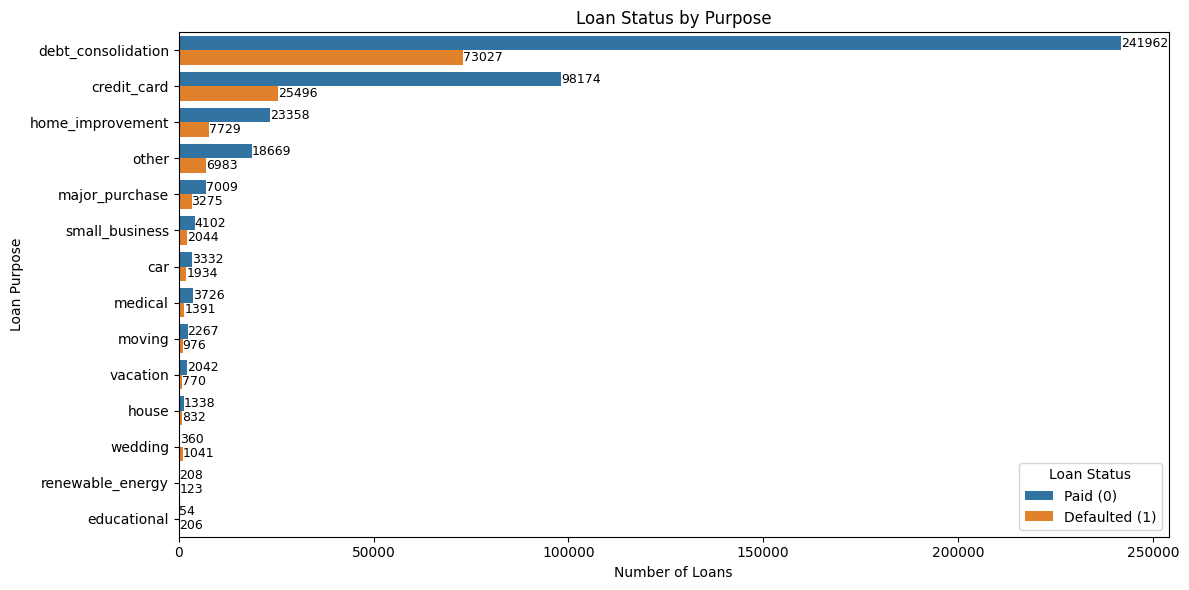

In [54]:
plt.figure(figsize = (12,6))
ax = sns.countplot(data = df,y = 'purpose',hue = 'loan_status',order = df['purpose'].value_counts().index)
plt.title("Loan Status by Purpose")
plt.xlabel("Number of Loans")
plt.ylabel("Loan Purpose")
plt.legend(title='Loan Status', labels=['Paid (0)', 'Defaulted (1)'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

Most Popular & Safer:
Debt Consolidation and Credit Card are the most common loan purposes.

They have high default numbers but relatively lower default rates (~21-23%) due to large volume.

 Riskier Loan Purposes (High % Default):
House, Car, and Renewable Energy loans show very high default percentages (~37-38%).

Even though volume is low, the risk is high – banks should watch these categories.

# Feature Engineering

### Ordinal Encoding for Ordered Categories

#### grade (A to G → 1 to 7)

In [55]:
# Ordinal encode loan grade (A to G)
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['grade'] = df['grade'].map(grade_map)


#### sub_grade (A1 to G5 → 1 to 35)

In [56]:
# Create an ordinal mapping for sub_grade
subgrades = sorted(df['sub_grade'].unique())
subgrade_map = {sub: i + 1 for i, sub in enumerate(subgrades)}
df['sub_grade'] = df['sub_grade'].map(subgrade_map)


#### One-Hot Encoding for Nominal Categories

####  Columns to One-Hot Encode:
home_ownership

verification_status

purpose

application_type

In [57]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['home_ownership', 'verification_status', 'purpose', 'application_type'], drop_first=True)


### Scaling Numerical Features

 Columns for Scaling:
loan_amnt

int_rate

annual_inc

revol_util

tot_cur_bal

tot_coll_amt

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to scale
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'revol_util', 'tot_cur_bal', 'tot_coll_amt']

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])


After scaling, features like loan amount and interest rate no longer dominate due to their original magnitude. This balances the influence of all numerical inputs, improving convergence and fairness in algorithms such as logistic regression, KNN, and SVM.

# Outlier Detection & Handling

###  Identify Numeric Columns for Outlier Detection

In [59]:
# Select numerical columns (excluding target if needed)
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].describe()


,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,...,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,...,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000
mean,3.500547e+07,0.413264,43.195790,0.334726,2.797141,11.954745,6.049705,0.007773,18.138767,0.314439,...,25.267319,1753.428788,0.394954,45.717832,4.859221,0.014297,0.005015,0.000396,0.016068,0.236327
std,2.412148e+07,0.244476,10.996354,0.185028,1.312184,6.489916,3.506886,0.006864,8.369074,0.860034,...,11.843035,2093.199837,4.091546,409.647467,63.123361,0.132993,0.079116,0.003787,0.019054,0.424826
min,7.047300e+04,0.000000,36.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.086688e+07,0.217391,36.000000,0.197296,2.000000,7.000000,3.000000,0.004611,11.930000,0.000000,...,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002901,0.000000
50%,3.709590e+07,0.362319,36.000000,0.324039,3.000000,11.000000,6.000000,0.006717,17.650000,0.000000,...,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008184,0.000000
75%,5.848920e+07,0.565217,60.000000,0.459654,4.000000,16.000000,10.000000,0.009349,23.950000,0.000000,...,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024505,0.000000
max,7.354484e+07,1.000000,60.000000,1.000000,7.000000,35.000000,10.000000,1.000000,672.520000,30.000000,...,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,14.000000,1.000000,1.000000,1.000000


###  Detect Outliers Using the Z-Score Method

In [60]:
from scipy.stats import zscore
import numpy as np

# Compute Z-scores
z_scores = np.abs(zscore(df.select_dtypes(include='number')))

# Identify rows with any feature's z-score > 3
outliers = (z_scores > 3).any(axis=1)

# Count of outliers
print(f"Number of rows with outliers: {outliers.sum()}")


Number of rows with outliers: 91881


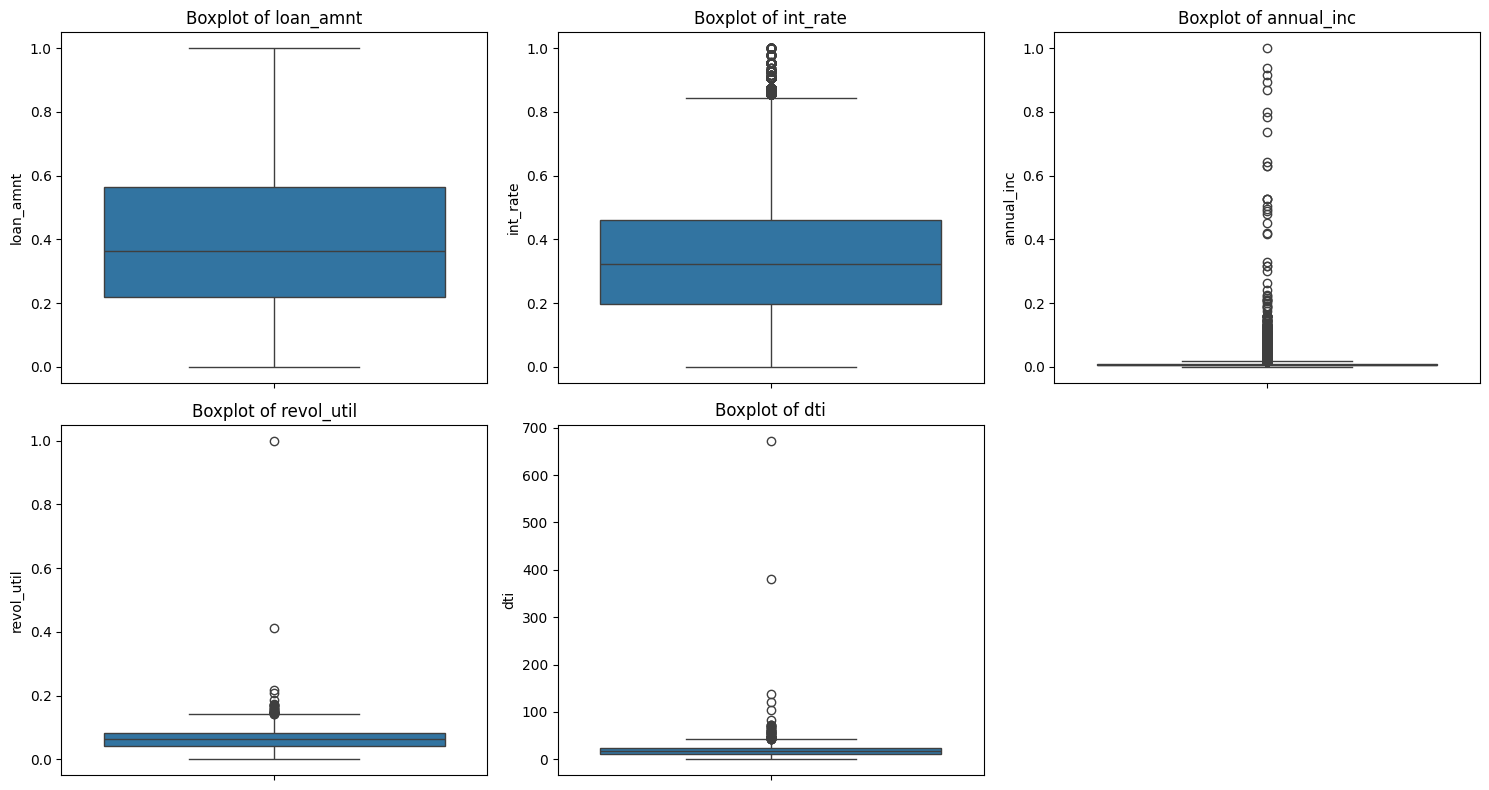

In [61]:
#Visualize Outliers with Boxplots

# Select key numerical columns for visualization
columns_to_plot = ['loan_amnt', 'int_rate', 'annual_inc', 'revol_util', 'dti']

# Plot boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

##### Clipping Outliers (Capping at 1st and 99th Percentile)

In [62]:
# Define columns to cap
columns_with_outliers = ['loan_amnt', 'int_rate', 'annual_inc', 'revol_util', 'dti']

# Apply clipping for each column
for col in columns_with_outliers:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

print("Outliers have been capped at 1st and 99th percentiles.")


Outliers have been capped at 1st and 99th percentiles.


#### Recheck Outliers After Capping:

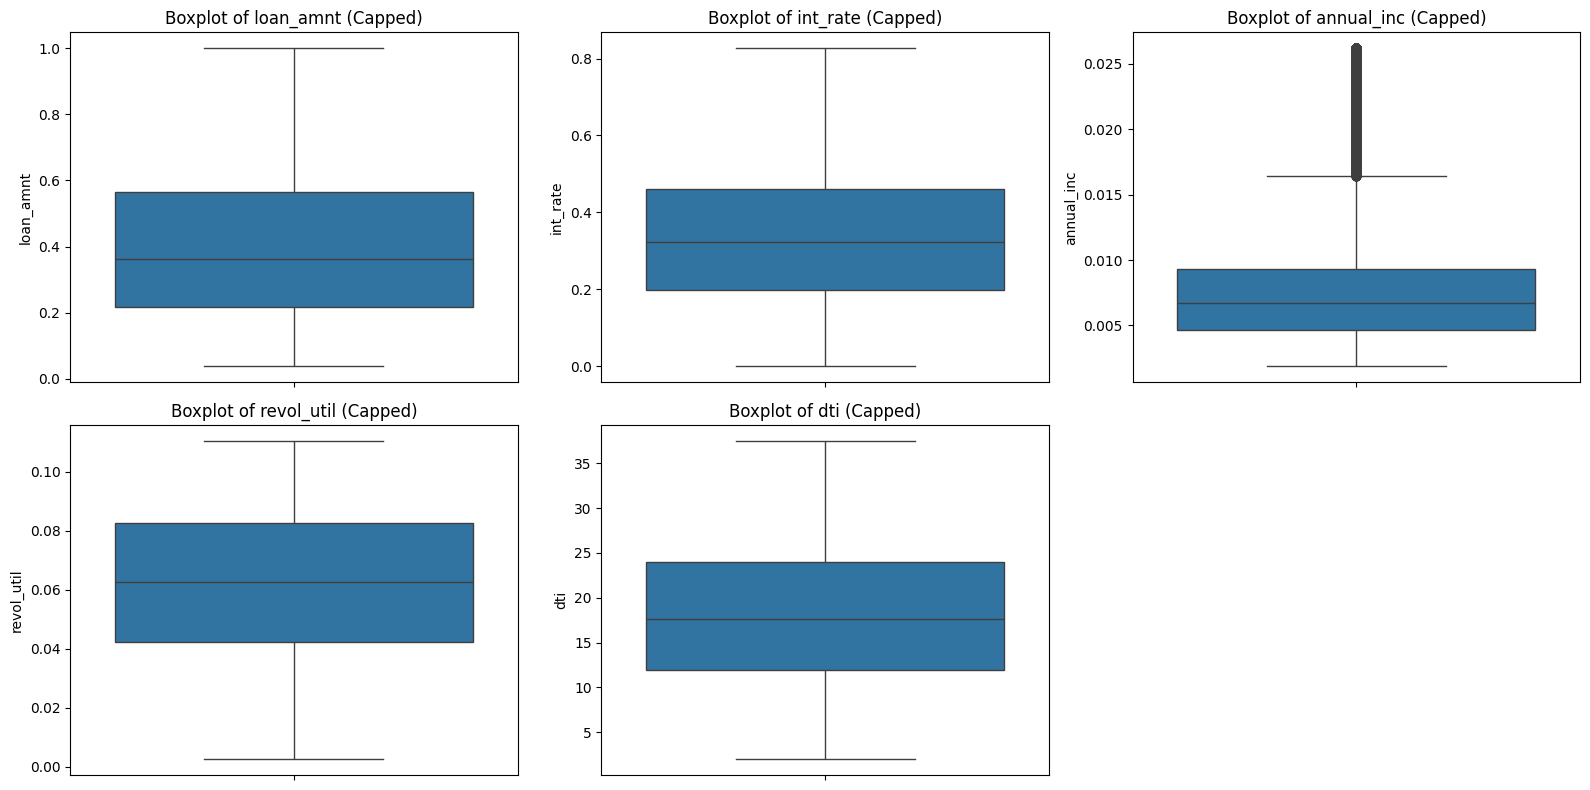

In [63]:

# Plot boxplots again after clipping
plt.figure(figsize=(16, 8))
for i, col in enumerate(columns_with_outliers):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col} (Capped)')

plt.tight_layout()
plt.show()

Outliers were capped at the 1st and 99th percentiles for key numerical features. This reduced the influence of extreme values without removing any rows, preserving data integrity and improving model robustness.

### Save your cleaned and transformed data

In [64]:
# Save your cleaned and transformed data
df.to_csv('cleaned_loan_data.csv', index=False)


# Preprocessing for Modeling

In [65]:
df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,annual_inc,pymnt_plan,title,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_JOINT
0,58189336,0.401449,36,0.585974,5,23,9.0,0.002895,n,Debt consolidation,...,False,False,False,False,False,False,False,False,False,False
1,70011223,0.124638,36,0.239544,2,9,0.5,0.006717,n,Home improvement,...,False,False,False,False,False,False,False,False,False,False
2,70255675,0.275362,36,0.081960,1,4,2.0,0.004611,n,Debt consolidation,...,False,False,False,False,False,False,False,False,False,False
3,1893936,0.420290,36,0.608365,4,20,10.0,0.010928,n,Debt consolidation,...,False,False,False,False,False,False,False,False,False,False
4,7652106,0.449275,36,0.224757,2,7,10.0,0.005348,n,refi,...,False,False,False,False,False,False,False,False,False,False


####  Define Features (X) and Target (y)

In [66]:
# Step 1: Define target and features
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [67]:
# Step 1: Drop unimportant or redundant columns
columns_to_drop = [
    'member_id',             # Unique ID
    'pymnt_plan',            # Mostly 'n'
    'title',                 # Similar to purpose (high cardinality)
    'zip_code',              # Redundant info
    'addr_state',            # Not encoded
    'initial_list_status',   # Low variance, not useful
    'last_week_pay',         # Unstructured text
    'grade',                 # Covered by sub_grade (or vice versa)
    'sub_grade'              # Already ordinal (if grade used)
]

X = X.drop(columns=columns_to_drop)


In [68]:
print(X)

        loan_amnt  term  int_rate  emp_length  annual_inc    dti  delinq_2yrs  \
0        0.401449    36  0.585974         9.0    0.002895  33.88          0.0   
1        0.124638    36  0.239544         0.5    0.006717   3.64          0.0   
2        0.275362    36  0.081960         2.0    0.004611  18.42          0.0   
3        0.420290    36  0.608365        10.0    0.010928  14.97          0.0   
4        0.449275    36  0.224757        10.0    0.005348  20.16          0.0   
...           ...   ...       ...         ...         ...    ...          ...   
532423   0.565217    36  0.302915        10.0    0.007769  14.53          0.0   
532424   0.333333    60  0.408534        10.0    0.006085  22.97          0.0   
532425   0.528261    60  0.653992         8.0    0.004348  27.27          0.0   
532426   0.594203    60  0.463456         1.0    0.005137  14.91          0.0   
532427   0.275362    36  0.045205         0.5    0.005453  17.80          0.0   

        inq_last_6mths  ope

Data types:
Make sure all features are numeric (no object or string types).

In [69]:
X.dtypes.value_counts()


float64    20
bool       20
int64       1
Name: count, dtype: int64

In [70]:
X.isnull().sum().sum()


np.int64(0)

In [71]:
numerical_cols = X.select_dtypes(include=['float64']).columns
X[numerical_cols].describe()


,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000
mean,0.413400,0.334344,6.049705,0.007624,18.132085,0.314439,0.694582,11.545578,0.194853,1.692128e+04,0.061693,25.267319,1753.428788,0.394954,45.717832,4.859221,0.014297,0.005015,0.000396,0.016068
std,0.244261,0.183934,3.506886,0.004326,8.251139,0.860034,0.997018,5.311363,0.583814,2.242322e+04,0.026598,11.843035,2093.199837,4.091546,409.647467,63.123361,0.132993,0.079116,0.003787,0.019054
min,0.037681,0.000000,0.500000,0.001874,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.002466,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217391,0.197296,3.000000,0.004611,11.930000,0.000000,0.000000,8.000000,0.000000,6.444000e+03,0.042250,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002901
50%,0.362319,0.324039,6.000000,0.006717,17.650000,0.000000,0.000000,11.000000,0.000000,1.187600e+04,0.062759,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008184
75%,0.565217,0.459654,10.000000,0.009349,23.950000,0.000000,1.000000,14.000000,0.000000,2.084300e+04,0.082483,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024505
max,1.000000,0.826785,10.000000,0.026193,37.470000,30.000000,31.000000,90.000000,86.000000,2.568995e+06,0.110389,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,14.000000,1.000000,1.000000


Drop these to simplify the model

In [72]:
columns_to_drop_more = [
    'acc_now_delinq',
    'tot_coll_amt',
    'collections_12_mths_ex_med',
    'collection_recovery_fee',
    'recoveries',
    'total_rec_late_fee',
    'pub_rec',
    'delinq_2yrs'
]
X.drop(columns=columns_to_drop_more, axis=1, inplace=True)


In [73]:
print(X)

        loan_amnt  term  int_rate  emp_length  annual_inc    dti  \
0        0.401449    36  0.585974         9.0    0.002895  33.88   
1        0.124638    36  0.239544         0.5    0.006717   3.64   
2        0.275362    36  0.081960         2.0    0.004611  18.42   
3        0.420290    36  0.608365        10.0    0.010928  14.97   
4        0.449275    36  0.224757        10.0    0.005348  20.16   
...           ...   ...       ...         ...         ...    ...   
532423   0.565217    36  0.302915        10.0    0.007769  14.53   
532424   0.333333    60  0.408534        10.0    0.006085  22.97   
532425   0.528261    60  0.653992         8.0    0.004348  27.27   
532426   0.594203    60  0.463456         1.0    0.005137  14.91   
532427   0.275362    36  0.045205         0.5    0.005453  17.80   

        inq_last_6mths  open_acc  revol_bal  revol_util  ...  purpose_house  \
0                  1.0      14.0    22515.0    0.081923  ...          False   
1                  1.0   

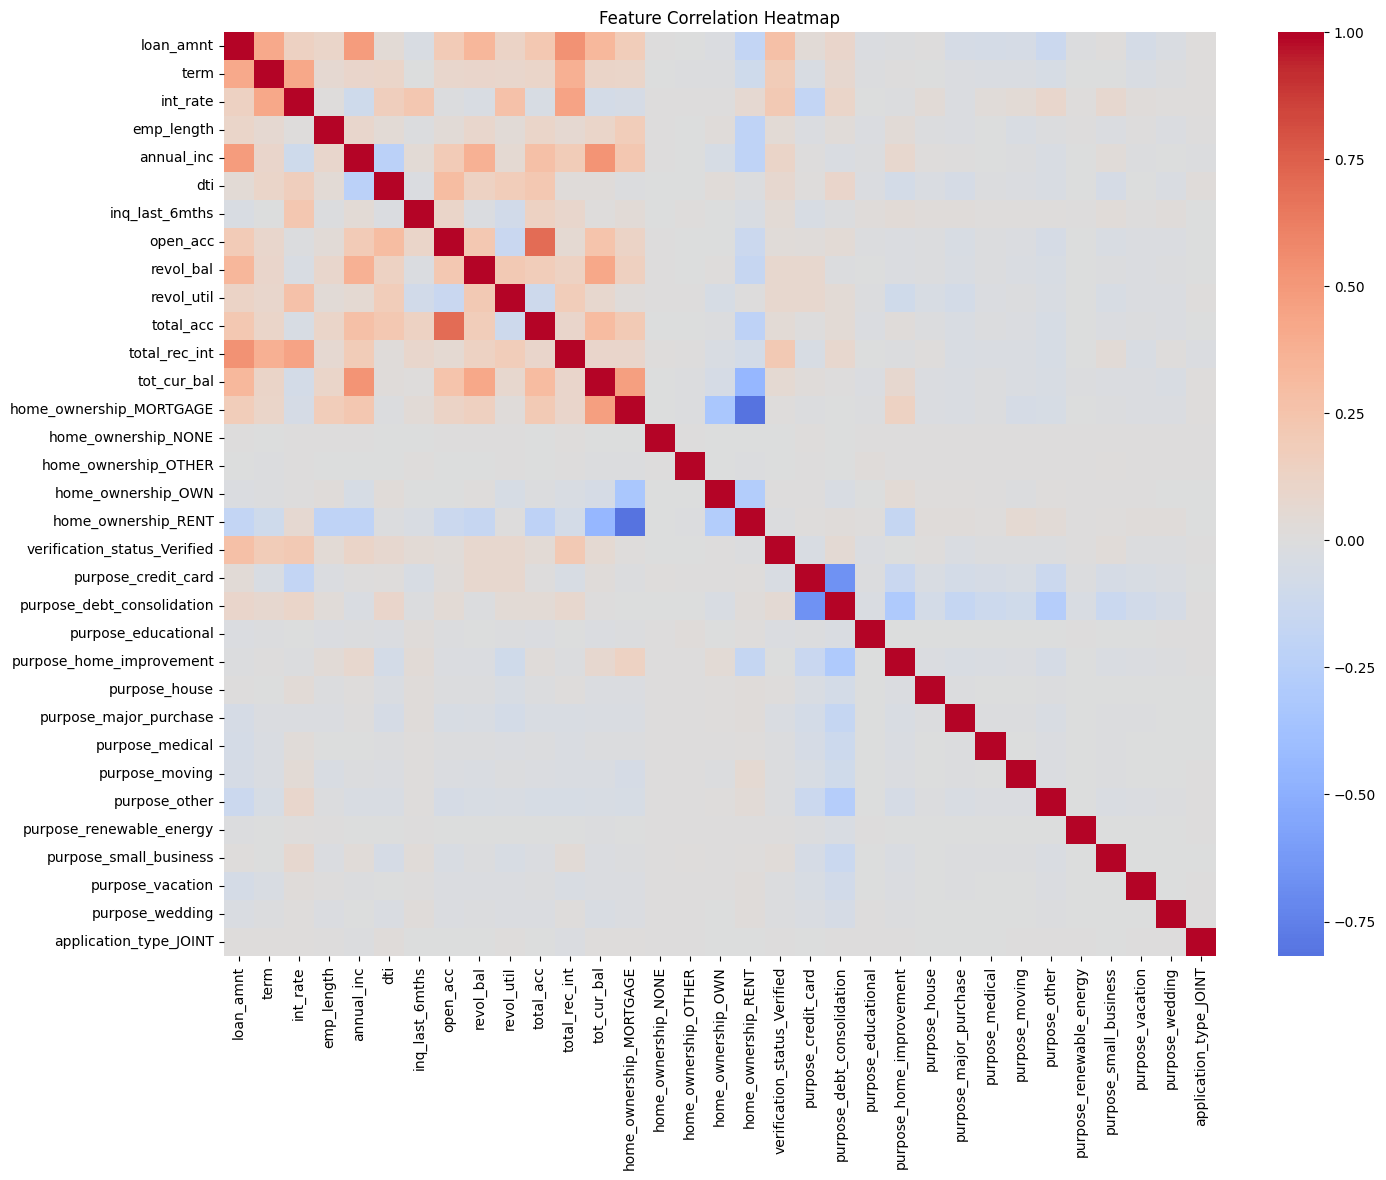

In [74]:
# Step 1: Compute the correlation matrix
corr_matrix = X.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


#### Columns to Drop (Based on Heatmap & Logic)

In [75]:
columns_to_drop_corr = [
    'recoveries',                   # High correlation with total_rec_int and charge-offs
    'collection_recovery_fee',     # Correlated with recoveries and charge-offs
    'total_rec_late_fee',          # Correlated with recoveries, low overall value
    'tot_cur_bal',                 # High correlation with revol_bal
    'revol_bal',                   # Less informative than revol_util (already scaled)
    'open_acc',                    # Weak correlation with target and others
    'collections_12_mths_ex_med',  # Near-zero variance — most values are 0
    'acc_now_delinq',              # Mostly 0 — lacks variation

    # Dummy vars with low event frequency (sparse/rare)
    'purpose_renewable_energy',
    'purpose_wedding',
    'purpose_vacation',
    'purpose_moving',
    'purpose_medical',
    'purpose_educational'
]

# Drop only existing columns to avoid KeyErrors
X = X.drop(columns=[col for col in columns_to_drop_corr if col in X.columns])


####  Step 2: Train-Test Split

In [76]:

# Step 3: Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


separated the target column loan_status from the features and split the data into training and test sets (80/20 split). Stratification ensures both sets have similar class distributions.

# Model building and Evaluation

####  Train Logistic Regression Model


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Train the Model

In [78]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model
log_reg.fit(X_train, y_train)


C:\Users\Arif Muhammed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

#### Make Predictions

In [79]:
# Predict on the test set
y_pred = log_reg.predict(X_test)


#### Evaluate the Model

In [80]:
# Accuracy
log_acc =  accuracy_score(y_test, y_pred)
print("Accuracy:",log_acc)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7627575455928479

Confusion Matrix:
[[80628   693]
 [24570   595]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.86     81321
           1       0.46      0.02      0.04     25165

    accuracy                           0.76    106486
   macro avg       0.61      0.51      0.45    106486
weighted avg       0.69      0.76      0.67    106486



####  K-Nearest Neighbors (KNN)

#####  Import the Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier

#### Initialize and Train the Model

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

#### : Predict on Test Set

In [83]:
y_pred_knn = knn.predict(X_test)

#### Evaluate the KNN Model

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:",knn_acc)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.727560430479124

Confusion Matrix:
[[73169  8152]
 [20859  4306]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83     81321
           1       0.35      0.17      0.23     25165

    accuracy                           0.73    106486
   macro avg       0.56      0.54      0.53    106486
weighted avg       0.68      0.73      0.69    106486



###  Xgboost classifier

#### Import the Model

In [86]:
from xgboost import XGBClassifier


#### Initialize and Train the Model

In [89]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

#### Predict on Test Set

In [90]:
y_pred_xgb = xgb_model.predict(X_test)

### Evaluate the xboost Model

In [92]:
xboost_acc = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:",xboost_acc)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.815327836523111
Confusion Matrix:
 [[77558  3763]
 [15902  9263]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     81321
           1       0.71      0.37      0.49     25165

    accuracy                           0.82    106486
   macro avg       0.77      0.66      0.69    106486
weighted avg       0.80      0.82      0.79    106486



#  Model Comparison: Classification Performance

In [93]:
scores = {
    "logistic Regression" :log_acc,
    "KNN classifier" :knn_acc,
    "Xboost classifier":xboost_acc
    
}
for model_name in scores:
    print(model_name, ":", f"{scores[model_name]:.4f}")

logistic Regression : 0.7628
KNN classifier : 0.7276
Xboost classifier : 0.8153


### Conclusion

Among the three models tested, the XGBoost Classifier outperformed both Logistic Regression and K-Nearest Neighbors, achieving the highest accuracy of 81.53%. This indicates that XGBoost is better at capturing the complex patterns and relationships within the dataset, making it a strong candidate for final model deployment in predicting loan outcomes.